In [1]:
from charm.toolbox.pairinggroup import PairingGroup, ZR, G1, G2, GT, pair
from charm.toolbox.ABEnc import ABEnc

In [2]:
from abenc_ph_mj18 import PH_ABE, mat_math, Inner_Productz


In [3]:
from nizk import NIZK
from benchmark import Benchmark
from collections import defaultdict 
import time
import matplotlib.pyplot as plt
import numpy as np

/home/guy1m0/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Benchmarking

In [4]:
ben = Benchmark(PairingGroup('MNT224'))
datasets = defaultdict(str)

In [6]:
xs = range(5,101,5)
datasets = ben.benchmark_scheme(2, xs, datasets)
datasets = ben.benchmark_scheme(3, xs, datasets)

---------------- 5 -----------------------
Each AA's cost:  0.05616531372070313
Each AA's extra cost:  0.18193602561950684
Adv's extra cost:  0.01116800308227539
Total cost:  0.36519956588745117
Total NIZK cost:  0.24902105331420898
---------------- 10 -----------------------
Each AA's cost:  0.07691738605499268
Each AA's extra cost:  0.34976673126220703
Adv's extra cost:  0.011234521865844727
Total cost:  0.8961577415466309
Total NIZK cost:  0.5004467964172363
---------------- 15 -----------------------
Each AA's cost:  0.09742321968078613
Each AA's extra cost:  0.517242431640625
Adv's extra cost:  0.01142573356628418
Total cost:  1.6362636089324951
Total NIZK cost:  0.7518951892852783
---------------- 20 -----------------------
Each AA's cost:  0.11946542263031007
Each AA's extra cost:  0.6842856407165527
Adv's extra cost:  0.011557817459106445
Total cost:  2.6195859909057617
Total NIZK cost:  1.0040595531463623
---------------- 25 -----------------------
Each AA's cost:  0.141605176

In [8]:
sp_xs = range(5,102,8)
datasets = ben.benchmark_scheme(5, sp_xs, datasets)
datasets = ben.benchmark_scheme(10, sp_xs, datasets)

---------------- 5 -----------------------
Each AA's cost:  0.11388740539550782
Each AA's extra cost:  0.4288601875305176
Adv's extra cost:  0.022312641143798828
Total cost:  0.833993673324585
Total NIZK cost:  0.5599071979522705
---------------- 13 -----------------------
Each AA's cost:  0.14696033184344953
Each AA's extra cost:  1.0632977485656738
Adv's extra cost:  0.023106813430786133
Total cost:  2.45310640335083
Total NIZK cost:  1.458299160003662
---------------- 21 -----------------------
Each AA's cost:  0.18127968197777158
Each AA's extra cost:  1.6994144916534424
Adv's extra cost:  0.01430964469909668
Total cost:  4.426610708236694
Total NIZK cost:  2.3572349548339844
---------------- 29 -----------------------
Each AA's cost:  0.18222341044195767
Each AA's extra cost:  2.255831003189087
Adv's extra cost:  0.024504899978637695
Total cost:  6.420131206512451
Total NIZK cost:  3.1787660121917725
---------------- 37 -----------------------
Each AA's cost:  0.2523321912095353
E

In [9]:
import pickle
with open('data_136K.pkl','wb') as file:
    pickle.dump(datasets, file)

## Ploting
### Each Entity

In [38]:
ks = [2,5]

xs = range(5,101,5)
ys = [] #AA, Adversary, DO, DU
labels = ["Normal Authority",  "Adversary", "Data Owner", "Data User"]
#ys.append([d['total'] for d in datasets[str(ks[0])]['seq']])

ys.append([(d['auth'] + d['keygen'])/i for i,d in zip(xs, datasets[str(ks[0])]['seq'])])
ys.append([d['ad_setup'] + d['ad_cancel_out'] + d['ad_keygen']/i for i,d in zip(xs, datasets[str(ks[0])]['seq'])])
ys.append([d['encrypt'] for d in datasets[str(ks[0])]['seq']])
ys.append([d['decrypt'] for d in datasets[str(ks[0])]['seq']])

In [44]:
def plot_entities(k, xs, ys, labels):
    # Plotting:
    plt.figure(figsize=(10,6))

    # List of linestyles for variation. You can extend this if needed.
    linestyles = ['-.', '--', '-',':']
    sp_linestyles = ['-.', ':', '-']
    
    # Plotting the regular data points for each k_value
    for y, label, style in zip(ys, labels, linestyles):
        #print (xs, y)
        plt.plot(xs, y, label=f'Entity: {label}', linestyle=style)

    # Setting labels, title, legend, etc.
    plt.xlabel('Size of attribute authority')
    plt.ylabel('Elapsed Time (seconds)')
    plt.title(f'Performance result with fixed k: {k}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    #plt.title(title)
    plt.show()

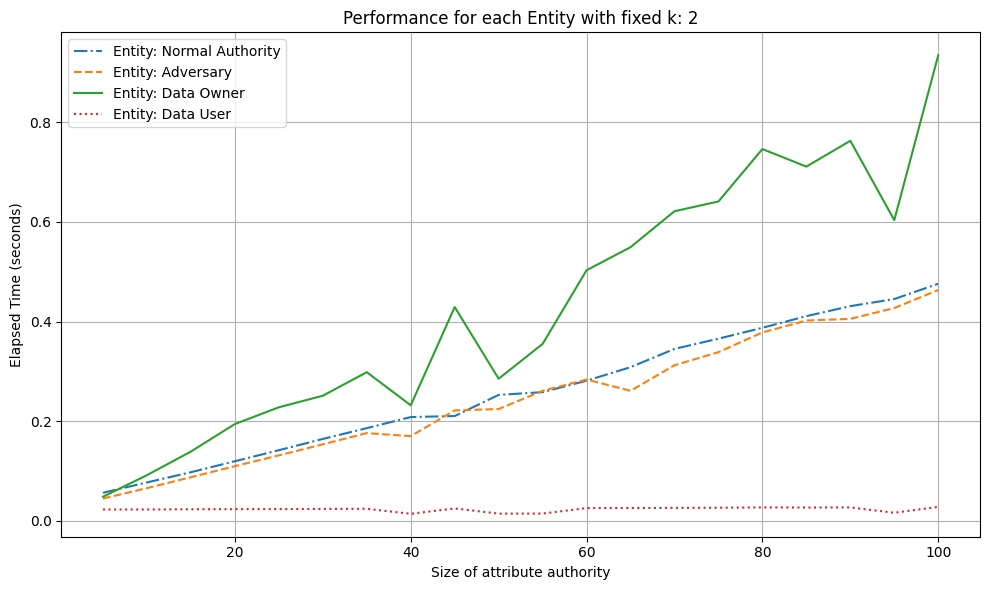

In [45]:
plot_entities(ks[0], xs, ys, labels)

In [43]:
def plot_linestyle(ks, xs, ys, sp_xs, sp_ys, labels):
    # Plotting:
    plt.figure(figsize=(10,6))

    # List of linestyles for variation. You can extend this if needed.
    linestyles = ['-', '--', ':']
    sp_linestyles = ['-.', ':', '-']
    
    # Plotting the regular data points for each k_value
    for y, label, style in zip(ys, labels, linestyles):
        #print (xs, y)
        plt.plot(xs, y, label=f'{label} with k={ks[0]}', linestyle=style)

    # Plotting the special cases
    for y, label, style in zip(sp_ys, labels, sp_linestyles):
        plt.plot(sp_xs, y, linestyle=style, marker='o', label=f'{label} with k={ks[1]}')

    vlines_x = [45, 85]  # example x-coordinates for the vertical lines

    for vx in vlines_x:
        plt.axvline(x=vx, color='gray', linestyle='--', alpha=0.7)  # draw vertical line
        
        if vx in xs:  # If vx is a value in xs, get its intersection with the regular plots
            idx = xs.index(vx)
            for y in ys:
                rounded_y = round(y[idx], 2)
                #plt.scatter(vx, rounded_y, color='red', zorder=5)
                plt.annotate(f'({vx}, {rounded_y})', (vx, rounded_y), textcoords="offset points", xytext=(0,10), ha='center')
        
        if vx in sp_xs:  # If vx is a value in sp_x, get its intersection with the special plots
            idx_sp = sp_xs.index(vx)
            for y in sp_ys:
                rounded_y_sp = round(y[idx_sp], 2)
                #plt.scatter(vx, rounded_y_sp, color='blue', zorder=5)
                plt.annotate(f'({vx}, {rounded_y_sp})', (vx, rounded_y_sp), textcoords="offset points", xytext=(0,10), ha='center')

    # Setting labels, title, legend, etc.
    plt.xlabel('Size of attribute authority')
    plt.ylabel('Elapsed Time (seconds)')
    #plt.title('Performance based on k-LIN Assumption Size')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    #plt.title(title)
    plt.show()


In [8]:
ks = [2,5]

xs = range(5,101,5)
ys = []
ys.append([d['total'] for d in datasets[str(ks[0])]['seq']])
ys.append([d['ad_setup'] + d['ad_cancel_out'] for d in datasets[str(ks[0])]['seq']])
ys.append([(d['auth'] + d['keygen'])/i for i,d in zip(xs, datasets[str(ks[0])]['seq'])])

#ys.append([d['total'] + d['prove'] + d['verify'] for d in datasets[str(ks[0])]['seq']])

#ys.append([d['total'] for d in datasets['3']['seq']])

sp_xs = range(5,102,8)
sp_ys = []
sp_ys.append([d['total'] for d in datasets[str(ks[1])]['seq']])
sp_ys.append([d['ad_setup'] + d['ad_cancel_out'] for d in datasets[str(ks[1])]['seq']])
sp_ys.append([(d['auth'] + d['keygen'])/i for i,d in zip(sp_xs, datasets[str(ks[1])]['seq'])])

#sp_ys.append([d['total'] + d['prove'] + d['verify'] for d in datasets[str(ks[1])]['seq']])



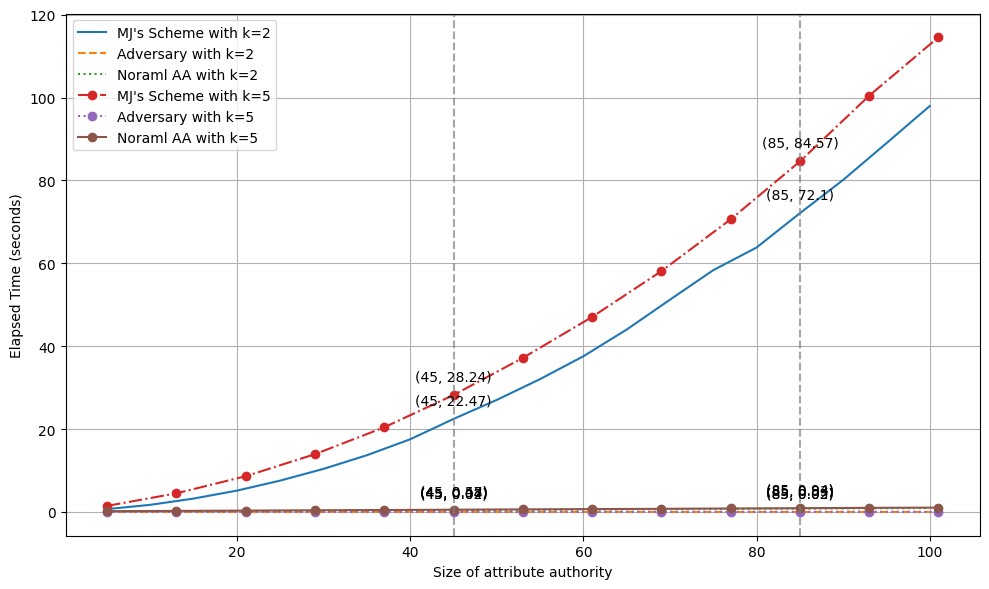

In [9]:
plot_linestyle(ks, xs, ys, sp_xs, sp_ys, ["MJ's Scheme", "Adversary", "Noraml AA"])

### Comparsion

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comp(ks, xss, ys, comp_ys, labels):
    plt.figure(figsize=(10, 6))

    linestyles = ['-', '-.','--', ':']

    # Plotting the subsequent data sets and calculating differences for Compare Set 1
    for i, k, y, y_,  style in zip(range(len(ks)), ks, ys, comp_ys, linestyles):
        plt.plot(xss[i], y, label=f'CP{i+1}: {labels[0]} with k={k}', linestyle=style)
        plt.plot(xss[i], y_, label=f'CP{i+1}: {labels[1]} with k={k}', linestyle=style, alpha=0.7)

        plt.fill_between(xss[i], y, y_, color='gray', alpha=0.2)

        diff = (np.array(y_) - np.array(y)) / np.array(y) * 100
        avg_increase = np.mean(diff)

        # Finding the midpoint for annotation
        mid_index = len(xss[i]) // 2  # Finding the index at the middle of the dataset
        mid_x = xss[i][mid_index]  # X-coordinate at the midpoint
        mid_y = (y[mid_index] + y_[mid_index]) / 2  # Average Y-coordinate at the midpoint

        plt.annotate(f'Avg. increase: {avg_increase:.2f}%', xy=(mid_x, mid_y), textcoords='data', ha='center', size= 25)

    plt.xlabel('Size of attribute authority')
    plt.ylabel('Time Cost (seconds)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    #plt.title(title)
    plt.show()


In [11]:
ks = [2,5,10]

xs = range(5,101,5)
comp_xs = range(5,102,8)
ys = []
comp_ys = []
ys.append([d['total'] for d in datasets[str(ks[0])]['seq']])
#ys.append([d['ad_setup'] + d['ad_keygen'] + d['ad_decrypt'] for d in datasets[str(ks[0])]['seq']])
comp_ys.append([d['total'] + d['prove'] + d['verify'] for d in datasets[str(ks[0])]['seq']])

ys.append([d['total'] for d in datasets[str(ks[1])]['seq']])
#sp_ys.append([d['ad_setup'] + d['ad_keygen'] + d['ad_decrypt'] for d in datasets[str(ks[1])]['seq']])
comp_ys.append([d['total'] + d['prove'] + d['verify'] for d in datasets[str(ks[1])]['seq']])

ys.append([d['total'] for d in datasets[str(ks[2])]['seq']])
#sp_ys.append([d['ad_setup'] + d['ad_keygen'] + d['ad_decrypt'] for d in datasets[str(ks[1])]['seq']])
comp_ys.append([d['total'] + d['prove'] + d['verify'] for d in datasets[str(ks[2])]['seq']])

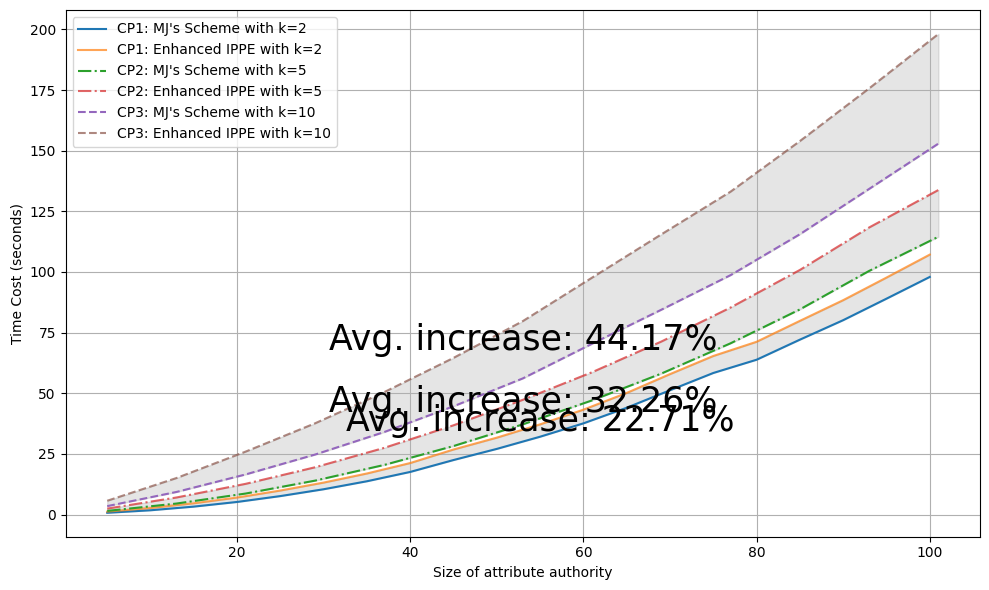

In [12]:
plot_comp(ks, [xs, comp_xs, comp_xs], ys, comp_ys, ["MJ's Scheme", 'Enhanced IPPE'])#, "Compare Cost for Original Scheme and our Enhanced IPPE")

In [13]:
ys = []
comp_ys = []
ks = [2,5,10]
ys.append([d['ad_setup'] + d['ad_cancel_out'] for d in datasets[str(ks[0])]['seq']])
comp_ys.append([d['prove'] + d['verify'] for d in datasets[str(ks[0])]['seq']])

ys.append([d['ad_setup'] + d['ad_cancel_out'] for d in datasets[str(ks[1])]['seq']])
comp_ys.append([d['prove'] + d['verify'] for d in datasets[str(ks[1])]['seq']])

ys.append([d['ad_setup'] + d['ad_cancel_out'] for d in datasets[str(ks[2])]['seq']])
comp_ys.append([d['prove'] + d['verify'] for d in datasets[str(ks[2])]['seq']])

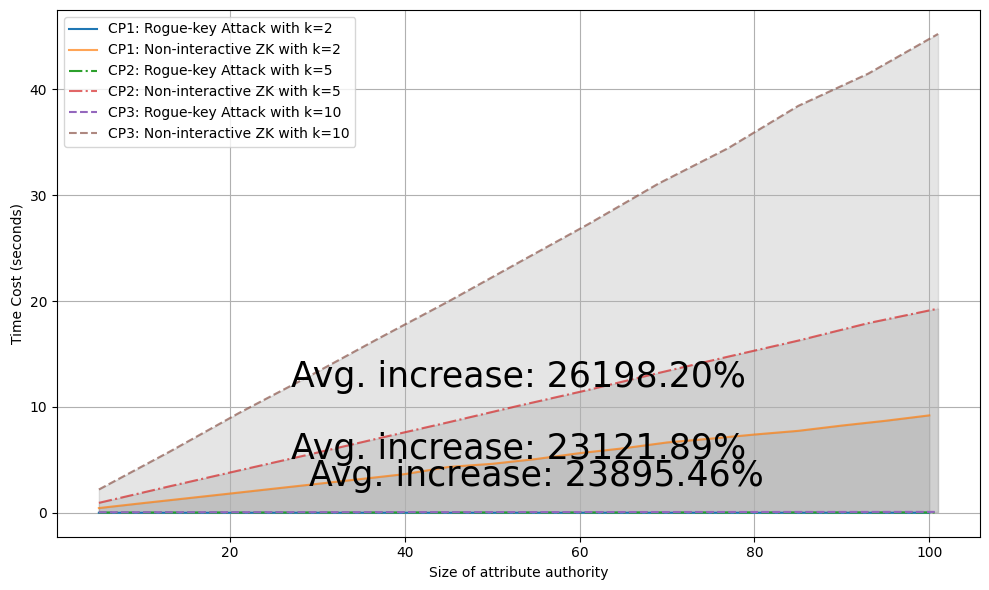

In [14]:
plot_comp(ks, [xs, comp_xs, comp_xs], ys, comp_ys, ['Rogue-key Attack','Non-interactive ZK'])#, "Compare Cost for Rogue-key Attack and its Defense")

In [7]:
print (list(range(1,5)))

[1, 2, 3, 4]
